# Notebook 1_3

## First-Order Physical Systems

#### Student Learning Outcomes
* Learn how to derive mathematical expressions for first-order systems.
* Learn the usage of International System of Units (SI units).=
* Learn the concept of the impulse signal.

--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt


<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Introduction </h2>
</div>



**System**, is an engineering perspective for analyzing and solving physics problems.

It is often framed as a cause-and-effect form, where cause is the input and the effect is the output. 

In practical applications, the input typically refers to something driving the system, while the output corresponds to measurable quantities that can be captured by sensors.

When analyzing the time-transient behaviors of systems, we denote input / output as **time-dependent variable**, :

* the input is commonly denoted as $x(t)$, 
* the output is commonly denoted as $y(t)$.

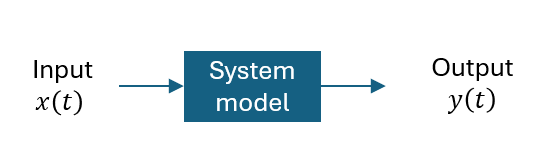

**First Order System**, is a type of systems that can be described by a first-order differential equation. 

For examples: 

$$
2 \frac{dy(t)}{dt} + y(t) = x(t),
$$

$$
4 \frac{dy(t)}{dt} = 10 x(t),
$$

$$
\frac{dy(t)}{dt} + 3y(t) = x(t),
$$

$$
...
$$

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Example: Hit a pool ball</h2>
</div>

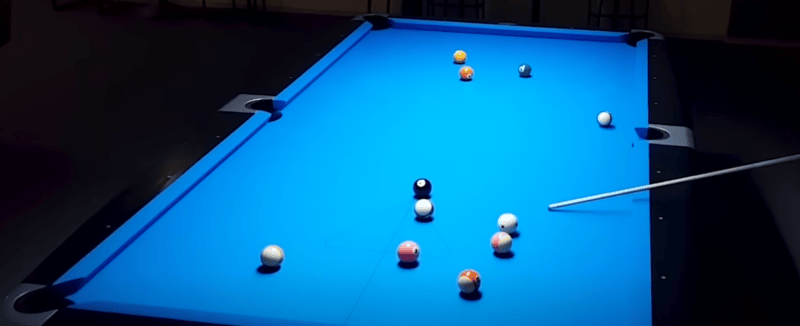

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Formulate a Diff Equation from Physical Principles</h2>
</div>

Based on **Newton’s Second Law of Motion**, when using a pool stick to hit a ball, it follows:
$$ F(t) = m\cdot a(t)$$

* $F$ is the force acting on the ball (N)
* $m$ is the mass of the ball (kg)
* $a$ is the acceleration of the ball (m/s²)

The mass of a pool ball is typically 0.6 pounds (lbs).  
In the next Python code cell, convert the mass to SI unit (International System of Unit).

In [2]:
## Input the number

m = 0.272
print(m)

0.272


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python output: 0.5 pts</strong>
</span>

The previous equation can be re-written as:
$$m \cdot \frac{dv(t)}{dt} = F(t)$$

The force $F(t)$ includes two parts:
$$F(t) = F_\text{hit}(t) - F_\text{friction}(t)$$

* The hitting force from the stick, $F_\text{hit}(t)$. 
* The friction force with the table, $F_\text{friction}(t)$. In reality, friction is a complicate topic. Here, we roughly approximate as

  $$F_\text{friction}(t) = b \cdot v(t)$$
Here $b$ is the friction coefficient. Here we assume the value f $b$ is is 0.12


In [3]:
## Run this code 
b = 0.12

Create a new Markdown cell, answer: what is the SI unit of $b$?

Given $b = \frac{F_\text{friction}(t)}{v(t)}$

The unit of $F_\text{friction}(t)$ is N (newtons), or $ \text{kg} \cdot \text{m/s}^2 $.

The unit of $v(t)$ is $ \text{m/s} $

So, the unit of $b$ is $\text{N}\cdot \text{s/m}$,or $\text{kg/s}$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>SI Unit answer: 0.5 pts</strong>
</span>

Combining the previous steps, we can obtain the diff equation for the system:
$$ m \cdot \frac{dv(t)}{dt} = F_\text{hit}(t) - F_\text{friction}(t) $$
$$ m \cdot \frac{dv(t)}{dt} = F_\text{hit}(t) - b \cdot v(t) $$
$$ m \cdot \frac{dv(t)}{dt} + b \cdot v(t) = F_\text{hit}(t) $$

Plug in the numbers of the mass $m$ and the friction coefficient $b$ into the last equation.  

Type the equation in a new cell below.

Does it look in a similar form as equations listed in the Introduction section?

$$ 0.272 \cdot \frac{dv(t)}{dt} + 0.12 \cdot v(t) = F_\text{hit}(t) $$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Diff equation: 1 pt</strong>
</span>

So far, we can see that our diff equation has 2 time-dependent variables:

* $F_\text{hit}(t)$, is the force that drives the ball to move, is the cause. We treat is as **Input**
* $v(t)$, is a measurable quantity, is the effect. We treat is as **Output** 

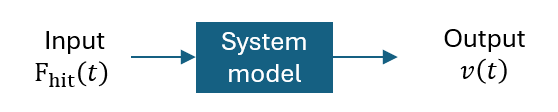

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: A System Input Type -- Impulse Input</h2>
</div>

In reality, when the stick hits the ball, the interaction occurs over a very short duration. After this small time window, there is no hit force applied.

So question is: how do we express such force interaction using $F_\text{hit}(t)$ mathematically?

In this task, we introduce concepts of **Impulse Input** and **Dirac delta function $\delta(t)$**

Dirac delta function $\delta(t)$ is a math function that represents an "ideal" impulse:

1. **Instantaneous Action:** The impulse occurs at a single time point at $t = 0$.

2. **Infinite Height, Zero Width:** $\delta(t)$ is impulse infinitely tall and infinitely narrow, but its total area (integral) is always 1:
   $$
   \int_{-\infty}^{\infty} \delta(t) \, dt = 1
   $$

Alternatively, it is called **Unit Impulse**.

----------


In practice, it is impossible to have a physical quantity that is infinite.

However, we can use this concept to approxiamtely express some signals, lets say $x(t)$, that lasts a very short duration. 

The idea is performing integration of our signal: $\int_{-\infty}^{\infty}x(t) \, dt = A$.

Then $A\delta(t)$ represents a scaled version of $\delta(t)$ 
, meaning an impulse with a different total strength.

--------------

Let us go back to our example, suppose the stick force applied on the ball is constant 10 N and only lasts 0.05 seconds.

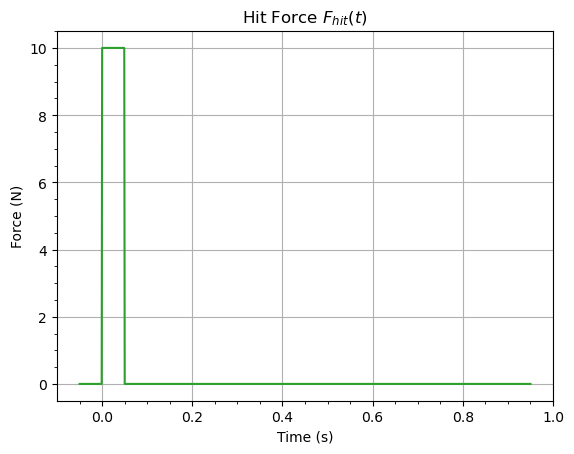

In [4]:
# run this code to display
start_time = 0.0 
end_time = 0.05   
height = 10      

t = np.linspace(-0.05, 0.95, 1000)  
force = np.zeros_like(t)
force[(t >= start_time) & (t < end_time)] = height

plt.plot(t, force, color="tab:green") 
plt.title("Hit Force $F_{hit}(t)$")  
plt.xlabel("Time (s)")  # X-axis label
plt.ylabel("Force (N)")  # Y-axis label
plt.grid(True)
plt.minorticks_on() 

From the graph above, can you answer: what is the result for $\int_{-\infty}^{\infty}F_{hit}(t) \, dt$.

Type your answer in the Python Code cell, set as a Python variable $A$.

In [5]:
## Enter your answer
## Recall the graph interpretation of integration: 
## It is the net area between the curve and X-axis

A = 10*0.05
print(A)

0.5


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Result of A: 1 pt</strong>
</span>

Once you get the numerical result of $A$, our input $F_{hit}(t)$ can now be expressed as:
$$A\delta(t)$$

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: System Output</h2>
</div>

Now, we have:
* System model: $$ m \cdot \frac{dv(t)}{dt} + b \cdot v(t) = F_\text{hit}(t) $$
* System input: $$ F_\text{hit}(t) = A\delta(t) $$

There is one unknown left here -- System Output $v(t)$.

Let's use ChatGPT to figure it out.

------------
> Copy and Paste these 3 lines into ChatGPT:
```markdown
* System model: $$ m \cdot \frac{dv(t)}{dt} + b \cdot v(t) = F_\text{hit}(t) $$
* System input: $$ F_\text{hit}(t) = A\delta(t) $$ (ideal impulse)
how to solve for System output $v(t)$ using separation of variables approach (not Laplace approach)"
```
----------

ChatGPT likely gave you a very tedious answer—**Don't Be Scared！** 

We won’t use such a "separation of variables approach" in this course. Instead, one key goal of this course is to teach you a much simpler method called **Laplace Transform**.

Create a Markdown cell below, only type the final answer for $v(t)$ given by ChatGPT.

$$v(t) = \frac{A}{m} e^{-\frac{b}{m} t} \quad \text{for } t \geq 0$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Result of $v(t)$: 1 pt</strong>
</span>

Create a Python Code cell below, plot the $v(t)$.

Note you have already set the numbers for $m$, $b$ and $A$ in Python in previous tasks.

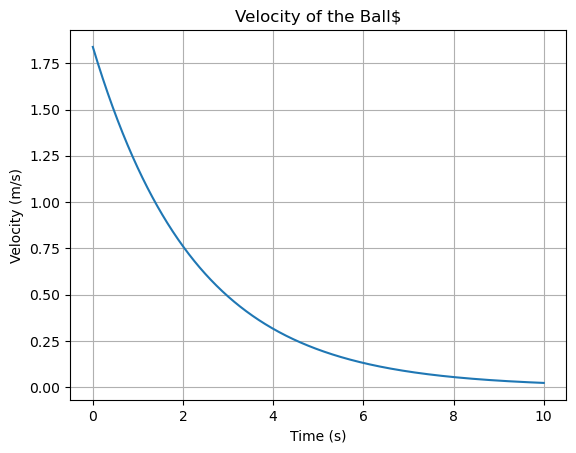

In [6]:
t_final = np.linspace(0,10,1000)
v_t_final = A/m*np.exp(-b*t_final/m)
plt.plot(t_final, v_t_final)
plt.title("Velocity of the Ball$")  
plt.xlabel("Time (s)")  # X-axis label
plt.ylabel("Velocity (m/s)")  # Y-axis label
plt.grid(True)

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python Plot of $v(t)$: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>

Re-call the procedures:

* The menu at the top of the Notebook has File, Edit, View, Run, etc.  
Choose File $\rightarrow$ Save and Export Notebook As... $\rightarrow$  HTML  
This should make an HTML file in your current folder . 
  
* Open the HTML file (it will open in a browser)  
Then use the browser to print as pdf  
(In some computers, if cannot print html in correct pdf,  
google "html to pdf converter free" and there are multiple websites can do it)

* Turn in the pdf to Blackboard.

